<Axes: xlabel='genero'>

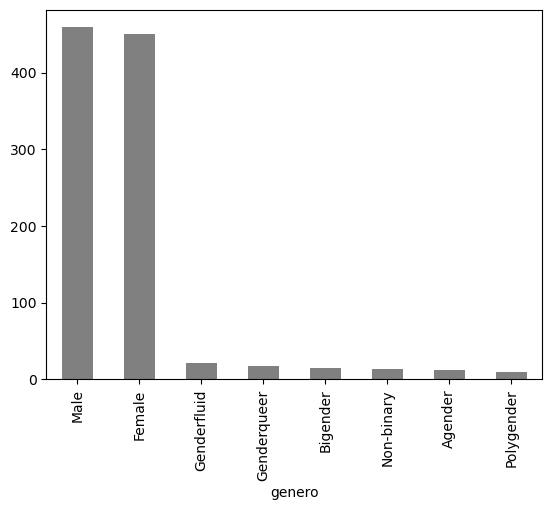

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_trabajadores = pd.read_csv('trabajadores.csv')
df_historial_ventas = pd.read_excel('historial_ventas.xlsx')

conteo_genero = df_trabajadores['genero'].value_counts()

conteo_genero.plot(kind='bar', color=['gray'])



<Axes: xlabel='trabajador_activo'>

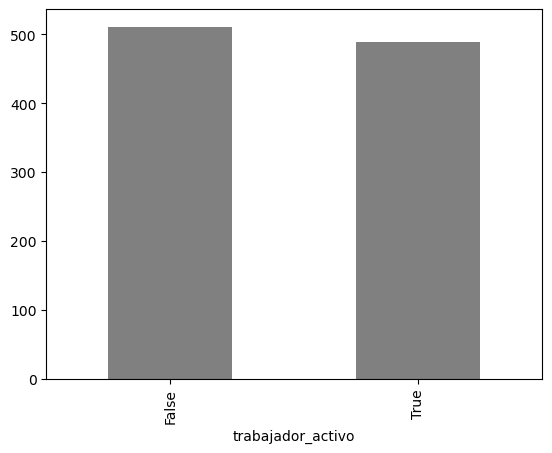

In [5]:
trabajador_activo = df_trabajadores['trabajador_activo'].value_counts()

trabajador_activo.plot(kind='bar', color=['gray'])

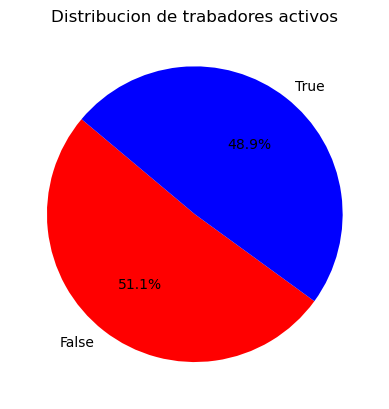

In [6]:
#plt.figure(figsize=(6,6))
plt.pie(
    trabajador_activo, 
    labels=trabajador_activo.index, 
    autopct='%1.1f%%', 
    colors=['red', 'blue'], 
    startangle=140
  )
plt.title('Distribucion de trabadores activos')
plt.show()

In [8]:
datos_productos = {
    'id_producto': [1000, 1001, 1002, 1003, 1004, 1005],
    'nombre_producto': ['Nutrecan', 'Solla', 'Salchicha', 'Quidacat', 'Conejos', 'Leche'],
    "precio_unitario": [15000, 8000, 20000, 25000, 15000, 4500]
}

df_productos_solla = pd.DataFrame(datos_productos)
df_ventas_merged = pd.merge(df_historial_ventas, df_productos_solla, on='id_producto', how='left')
df_ventas_merged['precio_total'] = df_ventas_merged['precio_unitario'] * df_ventas_merged['unidades_vendidas']
df_ventas_merged

,id_producto,unidades_vendidas,fecha_venta,credito,nombre_producto,precio_unitario,precio_total
0,1003,3972,2024-07-02,False,Quidacat,25000,99300000
1,1005,5729,2024-07-04,True,Leche,4500,25780500
2,1000,3558,2024-06-06,True,Nutrecan,15000,53370000
3,1004,3150,2024-06-24,False,Conejos,15000,47250000
4,1004,374,2024-07-27,True,Conejos,15000,5610000
...,...,...,...,...,...,...,...
995,1001,3960,2024-06-07,False,Solla,8000,31680000
996,1003,5513,2024-06-08,True,Quidacat,25000,137825000
997,1002,670,2024-06-27,False,Salchicha,20000,13400000
998,1001,5227,2024-08-13,True,Solla,8000,41816000


In [10]:
df_ventas_merged.to_excel('datos_ventas.xlsx', index=False)

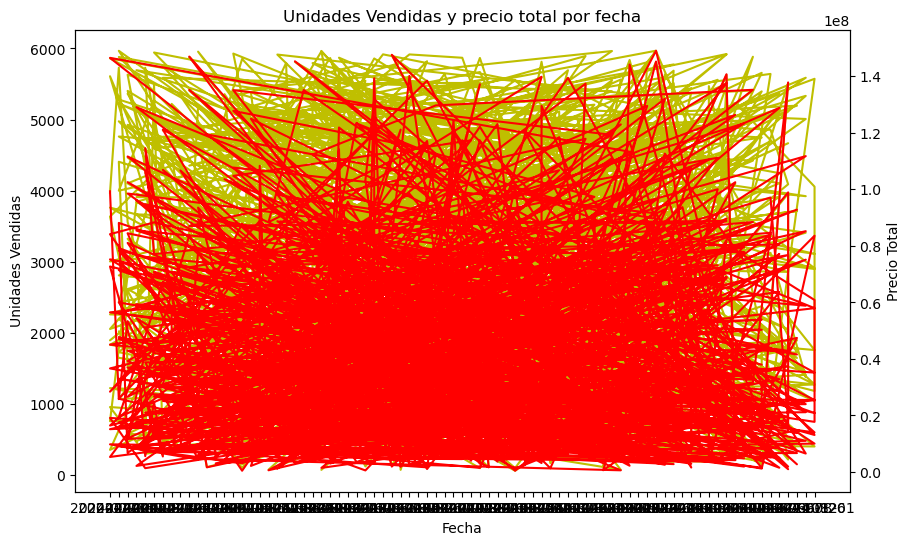

In [11]:
ig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(df_ventas_merged['fecha_venta'], df_ventas_merged['unidades_vendidas'], 'y-', label='Unidades vendidas')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Unidades Vendidas')

ax2 = ax1.twinx()
ax2.plot(df_ventas_merged['fecha_venta'], df_ventas_merged['precio_total'], 'r-', label='Precio Total')
ax2.set_ylabel('Precio Total')

plt.title('Unidades Vendidas y precio total por fecha')
plt.show()